## What Does This Do?

This code is meant to add $1 + 1 + 1 = 3$ on a quantum computer. This will be done by intitalizing an IBM quantum circuit with 5 quibits. Through the use of various quantum gates, and treating the measurements as the sum and carry columns, three 1 qubits will be added to receive the sum of 3.

## How Has This Been Done Before, and How is it Done Now?

This process has been shown in class both classically and on a quantum computer. As mentioned previously, the sum of three is acheieved by treating certain columns as the sum of the qubits and others as a carry over column. Classically, the gates used are AND and XOR gates. On a quantum computer, these correspond to the Toffoli and CNOT gates, respectively.

### Imports

First, we have to make all of our import statements. We import a number of useful tools from the qiskit package for using and visualizing our quantum circuit. Then we also have to import some python tools to plot the result.

In [1]:
#import qiskit tools
import qiskit 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise
from qiskit.visualization import plot_histogram


#import python stuff
import matplotlib.pyplot as plt
import numpy as np
import time

Next we have to load the IBMQ account to make sure that it is loaded if it was not already. This cell also will select the actual quantum computer that we will be running the circuit on.

In [5]:
# Set devices, if using a real device
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
quito = provider.get_backend('ibmq_belem')

ibmqfactory.load_account:WARNING:2021-10-09 17:04:10,588: Credentials are already in use. The existing account in the session will be replaced.


## Making the Circuit

The next three cells are dedicated to setting up the circuit that we will be using for our addition. The first cell initializes the quantum circuit using the qiskit tools we imported earlier.

Following the initialization of our quantum circuit, we then need to populate it with the qubits we will be measuring, the logic gates that will subject the qubits to the desired addition process, and then measure the result. This will return an instruction set that will be used later when actually running the circuit on a quantum computer.

Last, we will take advantage of more of the python and qiskit tools that were imported to run the instruction set on the previously decided on quantum computer. This will display the position of the instruction in the queue, and its success status. Once again, much of the code for running this circuit on the quantum computer has been taken from the CHSH Bell Inequality Jupyter Notebook.

In [3]:
#Initialize our Quantum Circuit
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

In [4]:
#Reset the starting qubits

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])

#Set the quantum logic gates
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.x(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[4])
circuit.ccx(qreg_q[0], qreg_q[2], qreg_q[4])
circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[4])

#Measure the final result
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])

In [9]:
# Execute and get counts

tic = time.time()
transpiled_circuit = transpile(circuit, quito) # transpile: compile onto a usable platform
job_real = quito.run(transpiled_circuit, shots=1000)
job_monitor(job_real)
result_real = job_real.result()
toc = time.time()

print(toc-tic)

Job Status: job has successfully run
11.605453252792358


## Visualization

Now that we have made and run the quantum circuit, we want to display the data in a useful way. The purpose of the circuit is to add three qubits together in an actual example of $1 + 1 + 1 = 3$ on a quantum computer. Using some qiskit tools, we can visualize this circuit in the same way that the IBM quantum composer does.

Following this, we can use matplotlib to visualize the results of the process in a histogram. We expect that, for the most part, we should see a result of 3 in the style of sum and carry. Due to this being on a quantum computer, we know not to expect the result to be 3 everytime like it would be on a classical computer.

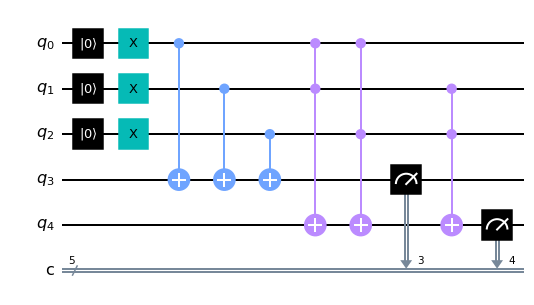

In [14]:
# editor = CircuitComposer(circuit=circuit)
# editor

circuit.draw()

In [10]:
counts = result_real.get_counts(circuit)
print(counts)

#print(result_real)

{'00000': 120, '10000': 193, '11000': 411, '01000': 276}


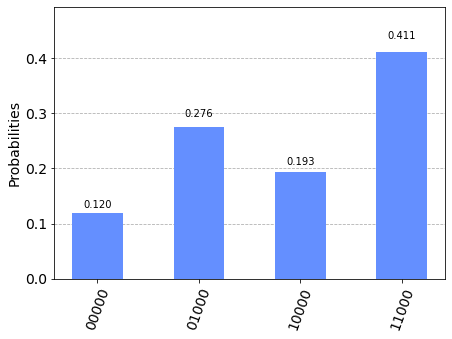

In [11]:
plot_histogram(counts)

### Results

This circuit can be seen to in majority give the correct result of $1 + 1 + 1 = 3$. There are a few problems and possible improvements however. First, despite the correct result being the most probable, it is less than $50%$ probable for the correct result to be given. This does not seem to be as useful as it could be due to this low probability. Additionally, the inputs of each qubit being set to $1$ are currently hard-coded. This means that one would have to manually change each qubit to check to make sure that the other results would also be correct. Ideally, this program would either run all possible combinations, or there would be an easier way of changing the inputs.